In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_auc_score,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import time
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb

data = pd.read_csv("C:\\Users\\Acer\\Edureka\\data.csv")

data.shape

(3390, 18)

In [2]:
data.describe()

,mileage,engine_power,car_price
count,3.390000e+03,3390.000000,3390.000000
mean,1.416107e+05,128.917109,15899.203540
std,6.142411e+04,39.384193,9444.167874
min,-6.400000e+01,0.000000,100.000000
25%,1.032490e+05,100.000000,10900.000000
50%,1.416600e+05,120.000000,14200.000000
75%,1.753025e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [3]:
data.head()

,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price
0,Edureka_motors,318 Gran Turismo,140245,105,01-10-2014,diesel,white,hatchback,False,True,False,False,True,True,True,True,01-03-2018,19200
1,Edureka_motors,218 Active Tourer,91512,100,01-06-2015,petrol,white,van,False,True,True,False,False,False,True,False,01-05-2018,14300
2,Edureka_motors,318,113744,100,01-06-2012,diesel,grey,sedan,True,True,False,False,False,False,True,False,01-06-2018,14300
3,Edureka_motors,320 Gran Turismo,195063,135,01-05-2014,diesel,black,hatchback,False,True,True,False,True,False,True,True,01-03-2018,16200
4,Edureka_motors,518,148943,100,01-11-2013,diesel,brown,estate,True,True,True,False,True,False,True,True,01-05-2018,17300


# Checking Unique Values in Dataset

In [4]:
data.apply(lambda x:len(x.unique()))

car_company             1
model_ID               72
mileage              3362
engine_power           58
registration_date     188
fuel                    4
car_paint_color        10
car_type                8
feature1                2
feature2                2
feature3                2
feature4                2
feature5                2
feature6                2
feature7                2
feature8                2
sold_date               9
car_price             407
dtype: int64

# Checking Null Values and missing Values

In [5]:
data.isnull().sum()

car_company          0
model_ID             0
mileage              0
engine_power         0
registration_date    0
fuel                 0
car_paint_color      0
car_type             0
feature1             0
feature2             0
feature3             0
feature4             0
feature5             0
feature6             0
feature7             0
feature8             0
sold_date            0
car_price            0
dtype: int64

In [6]:
data.dtypes

car_company          object
model_ID             object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
car_paint_color      object
car_type             object
feature1               bool
feature2               bool
feature3               bool
feature4               bool
feature5               bool
feature6               bool
feature7               bool
feature8               bool
sold_date            object
car_price             int64
dtype: object

In [7]:
# Let's check now how data  carefully how it impacting the target variable

data['fuel'].value_counts()

diesel           3239
petrol            142
hybrid_petrol       6
electro             3
Name: fuel, dtype: int64

In [8]:
# As we can see above there are different values in fuel and it is of object datatype so we have to change it
# to integer datatype so that we can apply algorithm on it.

data.replace(('diesel','petrol','hybrid_petrol','electro'),(2,1,3,4), inplace = True)

In [9]:
# As we can see that there are 8 feature which are of bool type so that we have to convert it into integer type
# I am assigning 0 to False and 1 for True

for col in ('feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8'):
    data[col].replace(True,1,inplace = True)
    data[col].replace(False,0,inplace = True)

In [10]:
# Let's check now our dataset, We have make some changes in it.
data.head()

,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price
0,Edureka_motors,318 Gran Turismo,140245,105,01-10-2014,2,white,hatchback,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,01-03-2018,19200
1,Edureka_motors,218 Active Tourer,91512,100,01-06-2015,1,white,van,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,01-05-2018,14300
2,Edureka_motors,318,113744,100,01-06-2012,2,grey,sedan,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,01-06-2018,14300
3,Edureka_motors,320 Gran Turismo,195063,135,01-05-2014,2,black,hatchback,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,01-03-2018,16200
4,Edureka_motors,518,148943,100,01-11-2013,2,brown,estate,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,01-05-2018,17300


In [11]:
# Now we seen that registration_date and sold_date are of object datatype, so we have to change it into datetime format
# So, that we can perform operation on that.
# We are creating a new column of regist_date of datetime object

for data['regist_date'] in data['registration_date']:
    data['regist_date'] = pd.to_datetime(data['registration_date'], format = '%d-%m-%Y')

In [12]:
# We are creating a new column named selling_date of datime so that we can perform operation on it


for data['selling_date'] in data['sold_date']:
    data['selling_date'] = pd.to_datetime(data['sold_date'], format = '%d-%m-%Y')

In [13]:
# We are checking how old car is and creating a new column Car_Age

data['Car_Age'] = (data['selling_date'] - data['regist_date']).dt.days

In [14]:
data['Car_Age'].head()

0    1247
1    1065
2    2191
3    1400
4    1642
Name: Car_Age, dtype: int64

In [15]:
# Now perform some data analysis on data so that we understand how dataset is working

data['car_type'].value_counts()

estate         1095
sedan           826
suv             746
hatchback       506
subcompact       79
coupe            71
van              35
convertible      32
Name: car_type, dtype: int64

In [16]:
data['car_paint_color'].value_counts()

black     1153
grey       795
blue       506
white      386
silver     234
brown      223
red         38
beige       36
green       14
orange       5
Name: car_paint_color, dtype: int64

In [17]:
data['sold_date'].value_counts()

01-05-2018    553
01-03-2018    521
01-04-2018    513
01-06-2018    441
01-07-2018    362
01-08-2018    359
01-02-2018    341
01-09-2018    158
01-01-2018    142
Name: sold_date, dtype: int64

# Data Visualization

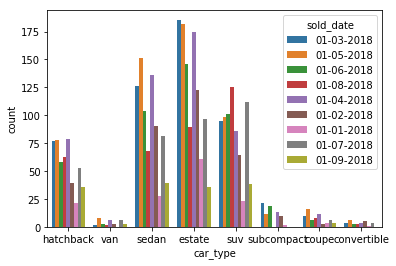

In [18]:
sns.countplot( x = "car_type", hue = "sold_date", data = data)

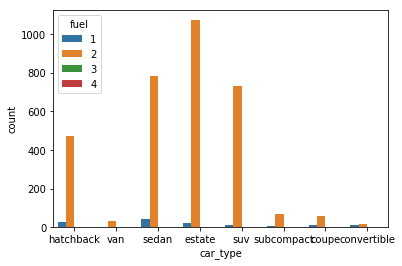

In [19]:
# Comparing Car type with fuel

sns.countplot(x = "car_type",hue = "fuel", data = data)

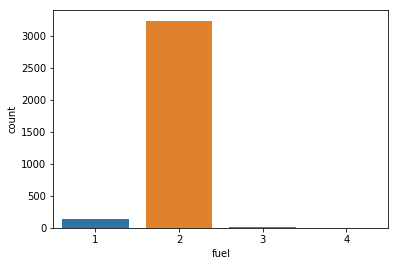

In [20]:
sns.countplot(x = 'fuel', data = data)

In [21]:
# Finding the co-relation of variables between target variables
co_relation = data.corr()['car_price'].sort_values()
co_relation

Car_Age        -0.441177
mileage        -0.393228
feature7        0.000808
fuel            0.039750
feature6        0.208656
feature2        0.242695
feature3        0.245378
feature5        0.252008
feature1        0.265113
feature4        0.418791
feature8        0.443792
engine_power    0.635380
car_price       1.000000
Name: car_price, dtype: float64

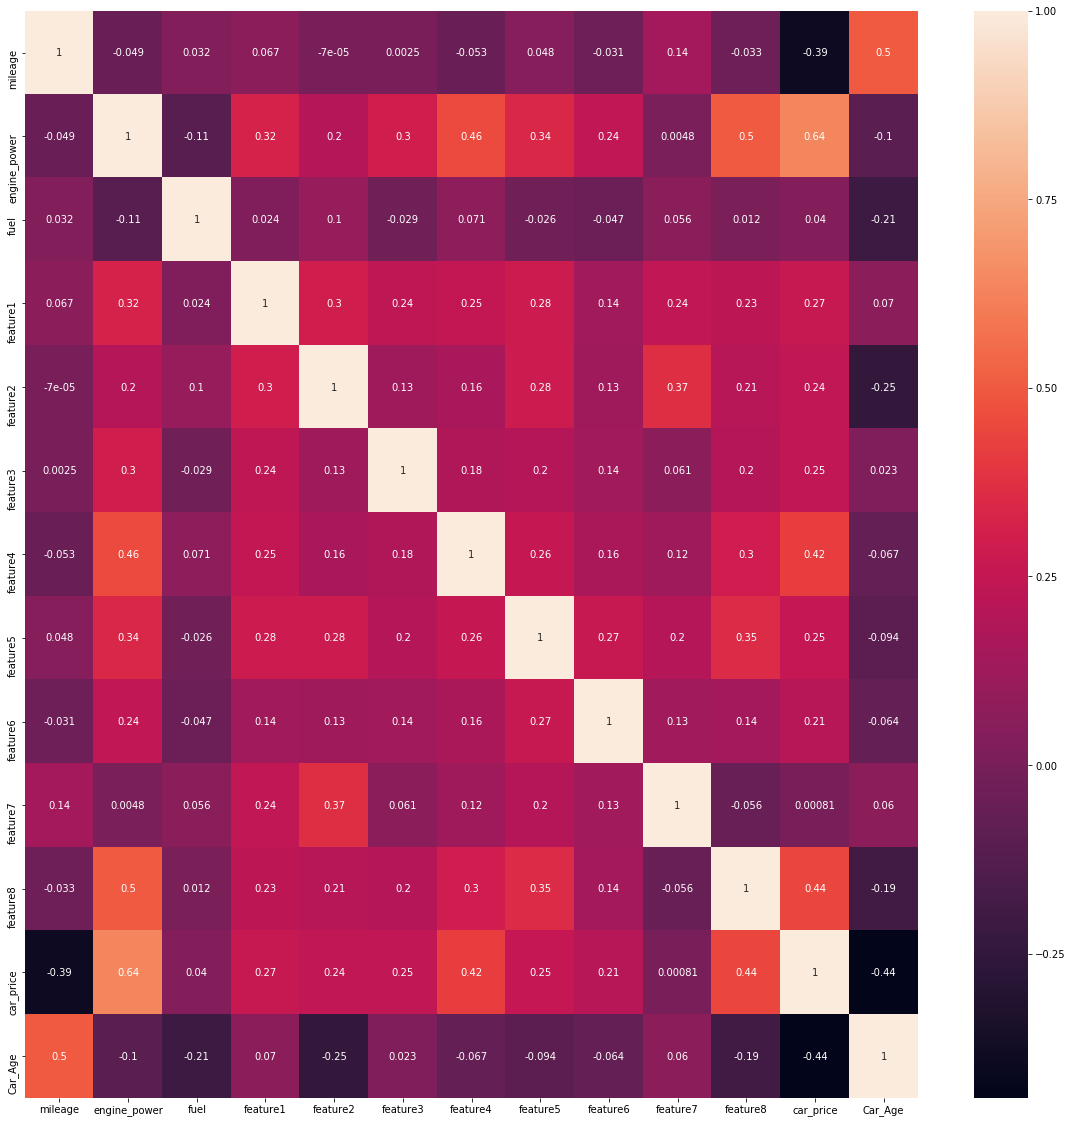

In [22]:
# Finding co-relation and plotting a heatmap diagram
cormat = data.corr()
top_corr_features = cormat.index
plt.figure(figsize = (20,20))
#Plot heatmap
sns.heatmap(data[top_corr_features].corr(), annot = True)

In [23]:
# Now we are removing those columns which are of no use of our

data.drop(['car_company','registration_date','car_paint_color','car_type','sold_date','regist_date','selling_date'],axis = 1, inplace = True)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(labels = ['model_ID'], axis = 1), data['car_price'],test_size = 0.3,
                                                 random_state = 0)

# Feature Selection

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.34224233e-02 7.79849362e-02 4.01304451e-05 1.26914690e-02
 2.36446854e-03 1.56033381e-04 2.18872250e-02 2.30172400e-03
 1.41560968e-04 4.69655545e-05 1.72111173e-01 6.78036680e-01
 1.88152108e-02]


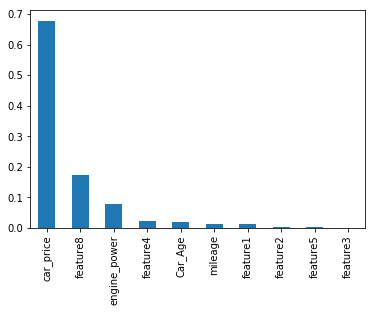

In [25]:
# We are checking  the importance of features which are impacting our target value most

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(10).plot(kind = 'bar')
plt.show()

# Feature Engineering

In [26]:
# Now perform feature engineering and try to set which feature values are best fit for our algorithm

max_depth = [4,10,20]
min_samples_leaf = [5,15,30]
n_estimators = [100,300,500]
learning_rate = [0.01,0.03,0.05]
param_grid = dict(max_depth = max_depth, min_samples_leaf = min_samples_leaf,n_estimators = n_estimators,learning_rate = learning_rate )

xg = xgb.XGBRegressor() 

In [27]:
grid = GridSearchCV(estimator = xg,param_grid = param_grid, cv = 3)
start_time = time.time()
grid_result = grid.fit(X_train,y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\l

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\l

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\l

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\l

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\l

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\l

In [28]:
print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))

Best: 0.949228 using {'learning_rate': 0.05, 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 500}


In [29]:
D_grid = {'max_depth': list(range(20,120)),
         'min_samples_leaf':list(range(5,50)),'n_estimators':list(range(100,500))}

xg = xgb.XGBRegressor() 

X_G_search = RandomizedSearchCV(estimator = xg,param_distributions = D_grid,cv = 3)

In [30]:
start_time = time.time()
Xg__res = X_G_search.fit(X_train,y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\l

In [31]:
print("Best: %f using %s" %(Xg__res.best_score_,Xg__res.best_params_))

Best: 0.949038 using {'n_estimators': 494, 'min_samples_leaf': 47, 'max_depth': 81}


In [39]:
XGB = xgb.XGBRegressor(n_estimators = 500, min_samples_leaf = 5, max_depth = 20,learning_rate = 0.05)
XGB.fit(X_train,y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=20,
       min_child_weight=1, min_samples_leaf=5, missing=None,
       n_estimators=500, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [40]:
X_predict = XGB.predict(X_test)

In [41]:
acc_xg = round(XGB.score(X_train,y_train)*100,2)
acc_xg

100.0

In [42]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300,num = 5)]
# Number of features consider at every split  split
max_features = ['auto','sqrt']
# Maximum number of level in tree
max_depth = [int (x) for x in np.linspace(10,110,num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum number of samples required at leaf node
min_samples_leaf = [1,4,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 4, 10], 'bootstrap': [True, False]}


In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.0s finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=15, n_jobs=-1,
          param_distributions={'n_estimators': [100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 4, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [44]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 35,
 'bootstrap': False}

In [47]:
forest = RandomForestRegressor(n_estimators = 300,min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto',
                               max_depth = 35, bootstrap = False)
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=35,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
forest_score = round(forest.score(X_train,y_train)*100,2)
forest_score

100.0

In [49]:
forest_predict = forest.predict(X_test)

In [51]:
X_train.dtypes

mileage           int64
engine_power      int64
fuel              int64
feature1        float64
feature2        float64
feature3        float64
feature4        float64
feature5        float64
feature6        float64
feature7        float64
feature8        float64
car_price         int64
Car_Age           int64
dtype: object

In [52]:
X_test.dtypes

mileage           int64
engine_power      int64
fuel              int64
feature1        float64
feature2        float64
feature3        float64
feature4        float64
feature5        float64
feature6        float64
feature7        float64
feature8        float64
car_price         int64
Car_Age           int64
dtype: object

In [53]:
submission = pd.DataFrame({'Car_Price':forest_predict})
submission.to_csv("Car_Price_Prediction.csv",index = False)

In [50]:
r2_score_final = r2_score(y_test,forest_predict) 
r2_score_final

0.9901823608015154

In [54]:
X_submission = pd.DataFrame({'car_price':X_predict})
X_submission.to_csv("XGB.csv", index = False)

In [55]:
# the first step of this procedure consists in building
# a machine learning algorithm using all the available features
# and then determine the importance of the features according
# to the algorithm

# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model using all the features
model_all_features = xgb.XGBRegressor(
    nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)

model_all_features.fit(X_train, y_train)

# calculate the roc-auc in the test set
y_pred_test = model_all_features.predict(X_test)
r2_score_all = r2_score(y_test, y_pred_test)
print('Test all features xgb R2 = %f' % (r2_score_all))

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Test all features xgb R2 = 0.984160


In [56]:
Hybrid_Submission = pd.DataFrame({'car_price':y_pred_test})
Hybrid_Submission.to_csv('Hybrid.csv', index = False)